# 岭回归

In [1]:
import numpy as np
import sklearn.linear_model as sl
import sklearn.metrics as sm
import matplotlib.pyplot as mp
import matplotlib.patches as mc

alpha=0
0.8333145129266567 0.8810902015493939 0.9088680274742242 0.6316676040040913 0.2535815930975701
alpha=150
0.7207871359540091 0.6786186890540336 0.7286967061714766 0.7100081145957982 0.4251059881415207


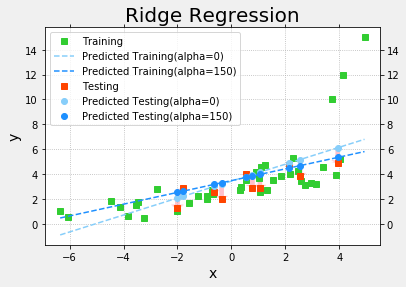

In [11]:
def read_data(filename):
    x,y = [],[]
    with open(filename,'r') as f:
        for line in f.readlines():
            data = [float(substr) for substr in line.split(',')]
            x.append(data[:-1])
            y.append(data[-1])
    return np.array(x),np.array(y)

# 对模型的训练
def train_model(alpha,x,y):
    # alpha作为排除异常值的阈值，
    # fit_intercept 设置截距
    model = sl.Ridge(alpha,fit_intercept=True,max_iter=10000)
    model.fit(x,y)
    return model

def pred_model(model,x):
    y = model.predict(x)
    return y

# 对模型进行评估
def eval_model(y,pred_y):
    mae = sm.mean_absolute_error(y,pred_y)
    mse = sm.mean_squared_error(y,pred_y)
    mde = sm.median_absolute_error(y,pred_y)
    evs = sm.explained_variance_score(y,pred_y)
    r2s = sm.r2_score(y,pred_y)
    print(mae,mse,mde,evs,r2s)
    
def init_chart():
    # 设置背景色
    mp.gcf().set_facecolor(np.ones(3)*240/255)
    mp.title('Ridge Regression',fontsize=20)
    mp.xlabel('x',fontsize=14)
    mp.ylabel('y',fontsize=14)
    # 设置刻度线，顶部和右部要有刻度
    mp.tick_params(which='both',top=True,right=True,
            labelright=True,labelsize=10)
    mp.grid(linestyle=':')
    
def draw_train(train_x,train_y,pred_train_y1,pred_train_y2):
    mp.plot(train_x,train_y,'s',c='limegreen',label='Training')
    sorted_indices = train_x.T[0].argsort()
    # print(train_x.T)
    mp.plot(train_x.T[0][sorted_indices],
           pred_train_y1[sorted_indices],'--',c='lightskyblue',
           label='Predicted Training(alpha=0)')
    mp.plot(train_x.T[0][sorted_indices],
           pred_train_y2[sorted_indices],'--',c='dodgerblue',
           label='Predicted Training(alpha=150)')
    mp.legend()
    
def draw_test(test_x,test_y,pred_test_y1,pred_test_y2):
    mp.plot(test_x,test_y,'s',c='orangered',label='Testing')
    mp.plot(test_x,pred_test_y1,'o',c='lightskyblue',
           label='Predicted Testing(alpha=0)')
    for x,pred_y,y in zip(test_x,pred_test_y1,test_y):
        mp.gca().add_patch(mc.Arrow(x,pred_y,0,y-pred_y,
                            width=0.8,ec='none',fc='pink'))
    mp.plot(test_x,pred_test_y2,'o',c='dodgerblue',
           label='Predicted Testing(alpha=150)')
    for x,pred_y,y in zip(test_x,pred_test_y2,test_y):
        mp.gca().add_patch(mc.Arrow(x,pred_y,0,y-pred_y,
                            width=0.8,ec='none',fc='pink'))
    mp.legend()

def show_chart():
    mp.show()

def main():
    x,y = read_data('abnormal.txt')
    train_size = int(x.size*0.8)
    train_x = x[:train_size]
    train_y = y[:train_size]
    # 普通的回归模型
    model1 = train_model(0,train_x,train_y)
    pred_train_y1 = pred_model(model1,train_x)
    # 岭回归模型
    model2 = train_model(150,train_x,train_y)
    pred_train_y2 = pred_model(model2,train_x)
    test_x = x[train_size:]
    test_y = y[train_size:]
    pred_test_y1 = pred_model(model1,test_x)
    pred_test_y2 = pred_model(model2,test_x)
    print('alpha=0')
    eval_model(test_y,pred_test_y1)
    print('alpha=150')
    eval_model(test_y,pred_test_y2)
    init_chart()
    draw_train(train_x,train_y,pred_train_y1,pred_train_y2)
    draw_test(test_x,test_y,pred_test_y1,pred_test_y2)
    show_chart()
    return 0

if __name__ == '__main__':
    main()
    
    
    